In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import profile_report
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [3]:
train.head()

,ID,countryCode,year,sex,agefrom,ageto,percentage_no_schooling,percentage_primary_schooling,percentage_primary_schooling_completed,percentage_secondary_schooling,percentage_secondary_schooling_completed,percentage_tertiary_schooling,percentage_tertiary_schooling_completed,yr_sch,region_code,literate_pop,target
0,ID_00AMK8K,155,1990,MF,15,999,8.3900,26.270000,15.830000,58.570000,26.420000,6.770000,4.400000,8.540000,Latin America and the Caribbean,7435.0,91.609167
1,ID_00ANS9C,115,2005,MF,25,999,0.6325,6.980833,6.363333,77.683333,49.995833,14.700833,13.546667,11.631667,Europe and Central Asia,14350.0,99.362969
2,ID_00AQU1S,30,2000,M,15,999,68.5300,26.320000,16.020000,4.620000,2.320000,0.540000,0.310000,1.550000,Sub-Saharan Africa,1458.0,31.469890
3,ID_00AVQ7Q,143,1960,MF,15,999,12.5300,69.370000,49.260000,8.130000,1.100000,9.970000,5.510000,7.490000,Latin America and the Caribbean,45.0,86.538462
4,ID_00BAH2C,70,1955,MF,25,999,20.9800,55.900000,22.380000,20.850000,10.240000,2.270000,1.950000,4.890000,Latin America and the Caribbean,2380.0,79.017264


In [4]:
test.head()

,ID,countryCode,year,sex,agefrom,ageto,percentage_no_schooling,percentage_primary_schooling,percentage_primary_schooling_completed,percentage_secondary_schooling,percentage_secondary_schooling_completed,percentage_tertiary_schooling,percentage_tertiary_schooling_completed,yr_sch,region_code,literate_pop
0,ID_00ILO0W,69,2010,MF,25,999,12.37,37.01,24.83,39.32,24.62,11.30,8.01,7.66,Latin America and the Caribbean,97760.0
1,ID_00KPO3Y,56,2010,M,15,999,16.77,54.94,24.52,28.27,13.55,0.03,0.02,5.32,Latin America and the Caribbean,3261.0
2,ID_00MLY2L,99,2010,M,25,999,11.60,30.36,17.55,44.61,25.21,13.43,9.16,8.27,Middle East and North Africa,6332.0
3,ID_00PVY5K,329,2010,F,15,999,4.78,11.73,9.94,69.66,42.76,13.84,8.39,10.39,Europe and Central Asia,4181.0
4,ID_00TLQ4J,70,2010,M,15,999,2.18,15.62,7.20,67.16,39.66,15.04,6.88,9.98,Latin America and the Caribbean,6387.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        14016 non-null  object 
 1   countryCode                               14016 non-null  int64  
 2   year                                      14016 non-null  int64  
 3   sex                                       14016 non-null  object 
 4   agefrom                                   14016 non-null  int64  
 5   ageto                                     14016 non-null  int64  
 6   percentage_no_schooling                   14016 non-null  float64
 7   percentage_primary_schooling              14016 non-null  float64
 8   percentage_primary_schooling_completed    14016 non-null  float64
 9   percentage_secondary_schooling            14016 non-null  float64
 10  percentage_secondary_schooling_com

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        1168 non-null   object 
 1   countryCode                               1168 non-null   int64  
 2   year                                      1168 non-null   int64  
 3   sex                                       1168 non-null   object 
 4   agefrom                                   1168 non-null   int64  
 5   ageto                                     1168 non-null   int64  
 6   percentage_no_schooling                   1168 non-null   float64
 7   percentage_primary_schooling              1168 non-null   float64
 8   percentage_primary_schooling_completed    1168 non-null   float64
 9   percentage_secondary_schooling            1168 non-null   float64
 10  percentage_secondary_schooling_compl

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
countryCode,14016.0,112.212329,90.990390,1.000000,50.000000,91.500000,131.000000,3.580000e+02
year,14016.0,1977.500000,17.260878,1950.000000,1963.750000,1977.500000,1991.250000,2.005000e+03
agefrom,14016.0,20.000000,5.000178,15.000000,15.000000,20.000000,25.000000,2.500000e+01
ageto,14016.0,999.000000,0.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02
percentage_no_schooling,14016.0,35.058990,30.836316,0.003333,6.200000,26.387917,60.120833,1.000000e+02
percentage_primary_schooling,14016.0,35.081346,20.827921,0.000000,17.710000,34.035000,49.870000,9.438000e+01
percentage_primary_schooling_completed,14016.0,18.336662,14.543279,0.000000,6.830000,15.235000,26.315000,8.526667e+01
percentage_secondary_schooling,14016.0,24.148922,20.248127,0.000000,6.820000,19.150000,37.650833,9.394333e+01
percentage_secondary_schooling_completed,14016.0,12.448905,13.100393,0.000000,2.470000,7.640000,18.760000,7.726000e+01
percentage_tertiary_schooling,14016.0,5.708469,7.103030,0.000000,0.850000,2.980000,8.150000,5.729000e+01


In [8]:
train.corr()['target']

countryCode                                 0.341401
year                                        0.349093
agefrom                                    -0.107713
ageto                                            NaN
percentage_no_schooling                    -0.999879
percentage_primary_schooling                0.579174
percentage_primary_schooling_completed      0.620742
percentage_secondary_schooling              0.732198
percentage_secondary_schooling_completed    0.638689
percentage_tertiary_schooling               0.555142
percentage_tertiary_schooling_completed     0.538131
yr_sch                                      0.896004
literate_pop                                0.114761
target                                      1.000000
Name: target, dtype: float64

In [9]:
# train.profile_report()

In [10]:
# Missing values
train.isnull().sum()

ID                                          0
countryCode                                 0
year                                        0
sex                                         0
agefrom                                     0
ageto                                       0
percentage_no_schooling                     0
percentage_primary_schooling                0
percentage_primary_schooling_completed      0
percentage_secondary_schooling              0
percentage_secondary_schooling_completed    0
percentage_tertiary_schooling               0
percentage_tertiary_schooling_completed     0
yr_sch                                      0
region_code                                 0
literate_pop                                0
target                                      0
dtype: int64

In [11]:
test.isnull().sum()

ID                                          0
countryCode                                 0
year                                        0
sex                                         0
agefrom                                     0
ageto                                       0
percentage_no_schooling                     0
percentage_primary_schooling                0
percentage_primary_schooling_completed      0
percentage_secondary_schooling              0
percentage_secondary_schooling_completed    0
percentage_tertiary_schooling               0
percentage_tertiary_schooling_completed     0
yr_sch                                      0
region_code                                 0
literate_pop                                0
dtype: int64

<AxesSubplot:>

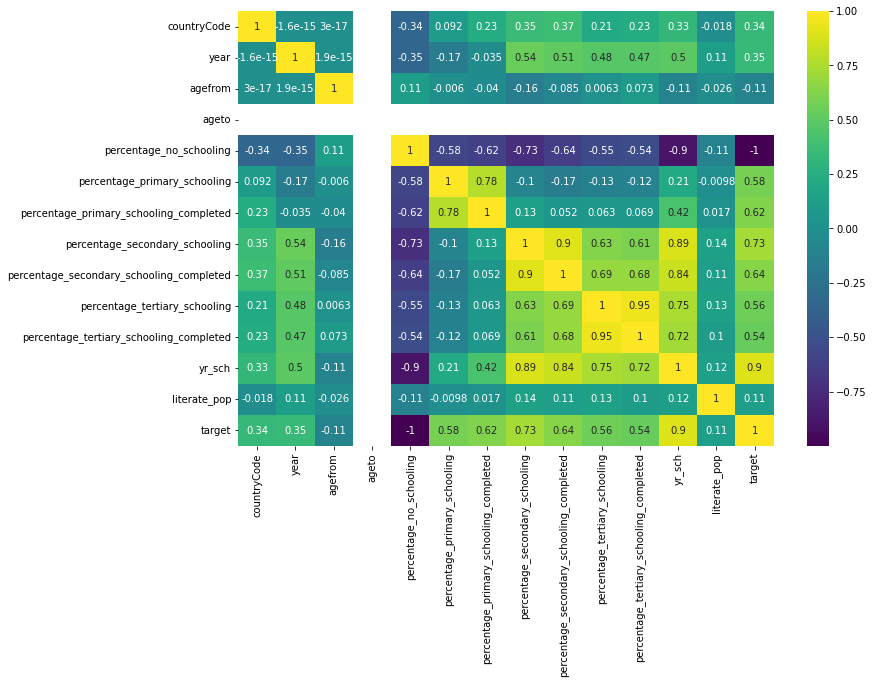

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, cmap='viridis')

## Dealing with categorical variables

In [13]:
train.columns

Index(['ID', 'countryCode', 'year', 'sex', 'agefrom', 'ageto',
       'percentage_no_schooling', 'percentage_primary_schooling',
       'percentage_primary_schooling_completed',
       'percentage_secondary_schooling',
       'percentage_secondary_schooling_completed',
       'percentage_tertiary_schooling',
       'percentage_tertiary_schooling_completed', 'yr_sch', 'region_code',
       'literate_pop', 'target'],
      dtype='object')

In [14]:
train.head(2)

,ID,countryCode,year,sex,agefrom,ageto,percentage_no_schooling,percentage_primary_schooling,percentage_primary_schooling_completed,percentage_secondary_schooling,percentage_secondary_schooling_completed,percentage_tertiary_schooling,percentage_tertiary_schooling_completed,yr_sch,region_code,literate_pop,target
0,ID_00AMK8K,155,1990,MF,15,999,8.3900,26.270000,15.830000,58.570000,26.420000,6.770000,4.400000,8.540000,Latin America and the Caribbean,7435.0,91.609167
1,ID_00ANS9C,115,2005,MF,25,999,0.6325,6.980833,6.363333,77.683333,49.995833,14.700833,13.546667,11.631667,Europe and Central Asia,14350.0,99.362969


In [15]:
train.sex.unique()

array(['MF', 'M', 'F'], dtype=object)

In [16]:
test.columns

Index(['ID', 'countryCode', 'year', 'sex', 'agefrom', 'ageto',
       'percentage_no_schooling', 'percentage_primary_schooling',
       'percentage_primary_schooling_completed',
       'percentage_secondary_schooling',
       'percentage_secondary_schooling_completed',
       'percentage_tertiary_schooling',
       'percentage_tertiary_schooling_completed', 'yr_sch', 'region_code',
       'literate_pop'],
      dtype='object')

In [17]:
train1 = pd.get_dummies(data=train, columns=['sex', 'region_code']).drop(['sex_F', 'region_code_South Asia'], axis='columns')
test1 = pd.get_dummies(data=test, columns=['sex', 'region_code']).drop(['sex_F','region_code_South Asia'], axis='columns')

In [18]:
train.sex.value_counts()

MF    7008
M     3504
F     3504
Name: sex, dtype: int64

In [19]:
test.sex.value_counts()

MF    584
M     292
F     292
Name: sex, dtype: int64

In [20]:
train.region_code.value_counts()

Sub-Saharan Africa                 3168
Latin America and the Caribbean    2400
Advanced Economies                 2304
Europe and Central Asia            1920
East Asia and the Pacific          1824
Middle East and North Africa       1728
South Asia                          672
Name: region_code, dtype: int64

In [21]:
test.region_code.value_counts()

Sub-Saharan Africa                 264
Latin America and the Caribbean    200
Advanced Economies                 192
Europe and Central Asia            160
East Asia and the Pacific          152
Middle East and North Africa       144
South Asia                          56
Name: region_code, dtype: int64

In [22]:
train1.head(2)

,ID,countryCode,year,agefrom,ageto,percentage_no_schooling,percentage_primary_schooling,percentage_primary_schooling_completed,percentage_secondary_schooling,percentage_secondary_schooling_completed,...,literate_pop,target,sex_M,sex_MF,region_code_Advanced Economies,region_code_East Asia and the Pacific,region_code_Europe and Central Asia,region_code_Latin America and the Caribbean,region_code_Middle East and North Africa,region_code_Sub-Saharan Africa
0,ID_00AMK8K,155,1990,15,999,8.3900,26.270000,15.830000,58.570000,26.420000,...,7435.0,91.609167,0,1,0,0,0,1,0,0
1,ID_00ANS9C,115,2005,25,999,0.6325,6.980833,6.363333,77.683333,49.995833,...,14350.0,99.362969,0,1,0,0,1,0,0,0


In [23]:
test1.head(2)

,ID,countryCode,year,agefrom,ageto,percentage_no_schooling,percentage_primary_schooling,percentage_primary_schooling_completed,percentage_secondary_schooling,percentage_secondary_schooling_completed,...,yr_sch,literate_pop,sex_M,sex_MF,region_code_Advanced Economies,region_code_East Asia and the Pacific,region_code_Europe and Central Asia,region_code_Latin America and the Caribbean,region_code_Middle East and North Africa,region_code_Sub-Saharan Africa
0,ID_00ILO0W,69,2010,25,999,12.37,37.01,24.83,39.32,24.62,...,7.66,97760.0,0,1,0,0,0,1,0,0
1,ID_00KPO3Y,56,2010,15,999,16.77,54.94,24.52,28.27,13.55,...,5.32,3261.0,1,0,0,0,0,1,0,0


In [24]:
train1['ageto'].unique()

array([999])

In [25]:
test.ageto.unique()

array([999])

In [26]:
unique_id = test1['ID']
train1.drop(['ageto', 'ID'], axis='columns', inplace=True)
test1.drop(['ageto', 'ID'], axis='columns', inplace=True)

In [27]:
print(train1.columns)
print(test1.columns)

Index(['countryCode', 'year', 'agefrom', 'percentage_no_schooling',
       'percentage_primary_schooling',
       'percentage_primary_schooling_completed',
       'percentage_secondary_schooling',
       'percentage_secondary_schooling_completed',
       'percentage_tertiary_schooling',
       'percentage_tertiary_schooling_completed', 'yr_sch', 'literate_pop',
       'target', 'sex_M', 'sex_MF', 'region_code_Advanced Economies',
       'region_code_East Asia and the Pacific',
       'region_code_Europe and Central Asia',
       'region_code_Latin America and the Caribbean',
       'region_code_Middle East and North Africa',
       'region_code_Sub-Saharan Africa'],
      dtype='object')
Index(['countryCode', 'year', 'agefrom', 'percentage_no_schooling',
       'percentage_primary_schooling',
       'percentage_primary_schooling_completed',
       'percentage_secondary_schooling',
       'percentage_secondary_schooling_completed',
       'percentage_tertiary_schooling',
       'percent

## Feature Engineering

In [28]:
percentage_schooling = (100- train1['percentage_no_schooling'])
train2 = train1.loc[:,:]
train2['percentage_schooling'] = percentage_schooling

In [ ]:
train2['percentage_schooling'].head()

0    91.6100
1    99.3675
2    31.4700
3    87.4700
4    79.0200
Name: percentage_schooling, dtype: float64

0    46.650000
1    69.905833
2    18.650000
3    55.870000
4    34.570000
Name: percentage_schooling_completed, dtype: float64

In [31]:
test1['percentage_schooling'] = 100 - test1['percentage_no_schooling']
test1['percentage_schooling_completed'] = (test1['percentage_primary_schooling_completed'] + test1['percentage_secondary_schooling_completed'] + test1['percentage_tertiary_schooling_completed'])
test1.columns

Index(['countryCode', 'year', 'agefrom', 'percentage_no_schooling',
       'percentage_primary_schooling',
       'percentage_primary_schooling_completed',
       'percentage_secondary_schooling',
       'percentage_secondary_schooling_completed',
       'percentage_tertiary_schooling',
       'percentage_tertiary_schooling_completed', 'yr_sch', 'literate_pop',
       'sex_M', 'sex_MF', 'region_code_Advanced Economies',
       'region_code_East Asia and the Pacific',
       'region_code_Europe and Central Asia',
       'region_code_Latin America and the Caribbean',
       'region_code_Middle East and North Africa',
       'region_code_Sub-Saharan Africa', 'percentage_schooling',
       'percentage_schooling_completed'],
      dtype='object')

In [32]:
train2.columns

Index(['countryCode', 'year', 'agefrom', 'percentage_no_schooling',
       'percentage_primary_schooling',
       'percentage_primary_schooling_completed',
       'percentage_secondary_schooling',
       'percentage_secondary_schooling_completed',
       'percentage_tertiary_schooling',
       'percentage_tertiary_schooling_completed', 'yr_sch', 'literate_pop',
       'target', 'sex_M', 'sex_MF', 'region_code_Advanced Economies',
       'region_code_East Asia and the Pacific',
       'region_code_Europe and Central Asia',
       'region_code_Latin America and the Caribbean',
       'region_code_Middle East and North Africa',
       'region_code_Sub-Saharan Africa', 'percentage_schooling',
       'percentage_schooling_completed'],
      dtype='object')

## Modelling

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [34]:
X = train2.drop(['target'], axis='columns')
y = train2.target

In [35]:
X.shape

(14016, 22)

In [36]:
y.shape

(14016,)

In [37]:
X.dtypes

countryCode                                      int64
year                                             int64
agefrom                                          int64
percentage_no_schooling                        float64
percentage_primary_schooling                   float64
percentage_primary_schooling_completed         float64
percentage_secondary_schooling                 float64
percentage_secondary_schooling_completed       float64
percentage_tertiary_schooling                  float64
percentage_tertiary_schooling_completed        float64
yr_sch                                         float64
literate_pop                                   float64
sex_M                                            uint8
sex_MF                                           uint8
region_code_Advanced Economies                   uint8
region_code_East Asia and the Pacific            uint8
region_code_Europe and Central Asia              uint8
region_code_Latin America and the Caribbean      uint8
region_cod

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [39]:
## Scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
## Using Cross Validation
# models = {
#          "DTReg":DecisionTreeRegressor(),
#          "RFReg":RandomForestRegressor(),
#          "GBR":GradientBoostingRegressor(),
#          "HGBR":HistGradientBoostingRegressor(),
#          "AdBR":AdaBoostRegressor(),
#          "XGBR":XGBRegressor(),
#          "CatBoostReg":CatBoostRegressor(verbose=None),
#          "LGBM":LGBMRegressor()}

# accuracy = []
# for name, model in models.items():
#     print("Training {}".format(name))
#     scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
#     print("cross val scores of {} : {}".format(name, scores))
#     print("Average score of {} : {}".format(name, scores.mean()))
#     print("-----------------------------------------------------")

In [41]:
len(train2.columns), (len(test1.columns))


(23, 22)

In [42]:
len(X_train.columns)

22

In [43]:
X_train.columns

Index(['countryCode', 'year', 'agefrom', 'percentage_no_schooling',
       'percentage_primary_schooling',
       'percentage_primary_schooling_completed',
       'percentage_secondary_schooling',
       'percentage_secondary_schooling_completed',
       'percentage_tertiary_schooling',
       'percentage_tertiary_schooling_completed', 'yr_sch', 'literate_pop',
       'sex_M', 'sex_MF', 'region_code_Advanced Economies',
       'region_code_East Asia and the Pacific',
       'region_code_Europe and Central Asia',
       'region_code_Latin America and the Caribbean',
       'region_code_Middle East and North Africa',
       'region_code_Sub-Saharan Africa', 'percentage_schooling',
       'percentage_schooling_completed'],
      dtype='object')

In [44]:
test1.columns

Index(['countryCode', 'year', 'agefrom', 'percentage_no_schooling',
       'percentage_primary_schooling',
       'percentage_primary_schooling_completed',
       'percentage_secondary_schooling',
       'percentage_secondary_schooling_completed',
       'percentage_tertiary_schooling',
       'percentage_tertiary_schooling_completed', 'yr_sch', 'literate_pop',
       'sex_M', 'sex_MF', 'region_code_Advanced Economies',
       'region_code_East Asia and the Pacific',
       'region_code_Europe and Central Asia',
       'region_code_Latin America and the Caribbean',
       'region_code_Middle East and North Africa',
       'region_code_Sub-Saharan Africa', 'percentage_schooling',
       'percentage_schooling_completed'],
      dtype='object')

In [45]:
scaler = StandardScaler().fit(X_train)
test2_scaled = scaler.transform(test1)

## CatBoostRegressor

In [46]:
#cbr = CatBoostRegressor(depth=5, od_type='Iter', random_seed=42)
cbr = CatBoostRegressor()
cbr.fit(X_train_scaled, y_train, verbose=False)
cbr_preds = cbr.predict(X_test_scaled)

In [47]:
print("Training Accuracy: {}".format(cbr.score(X_train_scaled, y_train)))
print("Testing Accuracy: {}".format(cbr.score(X_test_scaled, y_test)))

Training Accuracy: 0.9999447736712228
Testing Accuracy: 0.9998623084733115


In [48]:
cbr_preds_test = cbr.predict(test2_scaled)

In [49]:
cbr_preds_test

array([87.69017179, 83.25830855, 88.52648384, ..., 96.70060171,
       96.21531149, 99.42112171])

In [50]:
cbr_submission = pd.DataFrame({"ID":unique_id,
                                 "target": cbr_preds_test})
cbr_submission.to_csv("submission_cbr3.csv", index=False)


## Random Forrest

In [51]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [52]:
print("Training Accuracy: {}".format(cbr.score(X_train_scaled, y_train)))
print("Testing Accuracy: {}".format(cbr.score(X_test_scaled, y_test)))

Training Accuracy: 0.9999447736712228
Testing Accuracy: 0.9998623084733115


In [53]:
rf_preds_test = cbr.predict(test2_scaled)

In [54]:
rf_preds

array([ 9.9187977 , 58.32210662, 86.26542001, ..., 79.31282975,
       28.43182742, 44.22606371])

In [55]:
rf_submission = pd.DataFrame({"ID":unique_id,
                                 "target": cbr_preds_test})
rf_submission.to_csv("submission_rf2.csv", index=False)


## LightGBM Regressor

In [56]:
lgbm = LGBMRegressor()
lgbm.fit(X_train_scaled, y_train)

lgbm_preds = cbr.predict(test2_scaled)

submission = pd.DataFrame({"ID": unique_id,
                          "target": lgbm_preds})
submission.to_csv("submission_lgbm1.csv", index=False)

In [57]:
rf.feature_importances_

array([5.35554674e-06, 1.19673496e-06, 3.31248994e-07, 5.15009675e-01,
       2.96390736e-06, 5.92779904e-06, 1.44126102e-06, 6.25915050e-06,
       3.74338619e-06, 5.34023820e-06, 3.71363682e-06, 1.53898773e-04,
       6.00085893e-07, 3.30406598e-07, 3.34546733e-08, 2.89175052e-07,
       9.48262003e-09, 1.09461835e-07, 1.19094927e-07, 6.80664061e-08,
       4.84796331e-01, 2.26380923e-06])

In [58]:
lgbm_preds

array([87.69017179, 83.25830855, 88.52648384, ..., 96.70060171,
       96.21531149, 99.42112171])

In [59]:
print("Training Accuracy: {}".format(lgbm.score(X_train_scaled, y_train)))
print("Testing Accuracy: {}".format(lgbm.score(X_test_scaled, y_test)))

Training Accuracy: 0.999958138741386
Testing Accuracy: 0.9999109747362478
